In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



In [9]:
df= pd.read_csv("churndata.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Exploration

In [10]:
df.drop("customerID",axis=1,inplace=True)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
#change dt of total charges

df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [14]:
df.iloc[488]


gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [15]:
#Replace the whitespace with 'NaN'

df = df.replace('^\s*$',np.nan, regex = True)


In [16]:
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
#drop nulls

df.dropna(axis = 0 ,inplace = True)


In [18]:
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])



In [22]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

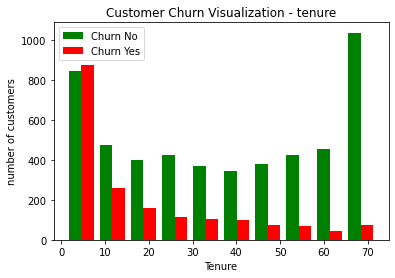

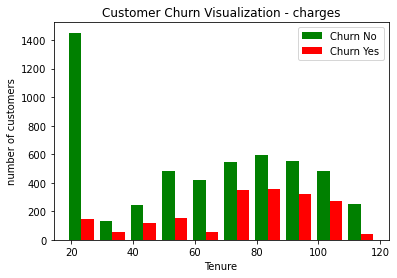

In [38]:
#checking tenure

churn_no = df[df.Churn=='No'].tenure
churn_yes = df[df.Churn=='Yes'].tenure


plt.hist([churn_no,churn_yes],color=['green','red'], label=["Churn No","Churn Yes"]);
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("number of customers")
plt.title("Customer Churn Visualization - tenure");


plt.figure() 



#checking monthly charges

churn_no = df[df.Churn=='No'].MonthlyCharges  
churn_yes = df[df.Churn=='Yes'].MonthlyCharges  


plt.hist([churn_no,churn_yes],color=['green','red'], label=["Churn No","Churn Yes"]);
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("number of customers")
plt.title("Customer Churn Visualization - charges");




In [51]:
#label encoding

def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':  #see only object dt
            print(f'{column} : {df[column].unique()}')    #f-strings

In [53]:
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [54]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

In [55]:
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [56]:
list(df.columns.values)


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [57]:
#replace with 1,0

yes_no_col = ['Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


for col in yes_no_col:
    df[col].replace("Yes","1",inplace=True)
    df[col].replace("No","0",inplace=True)


In [58]:
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['1' '0']
Dependents : ['0' '1']
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
DeviceProtection : ['0' '1']
TechSupport : ['0' '1']
StreamingTV : ['0' '1']
StreamingMovies : ['0' '1']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['1' '0']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['0' '1']


In [61]:
df['gender'].replace("Female","1",inplace=True)
df['gender'].replace("Male","0",inplace=True)

In [62]:
unique_col_values(df)

gender : ['1' '0']
Partner : ['1' '0']
Dependents : ['0' '1']
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
DeviceProtection : ['0' '1']
TechSupport : ['0' '1']
StreamingTV : ['0' '1']
StreamingMovies : ['0' '1']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['1' '0']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['0' '1']


In [63]:
#one hot encoding for contrac, InternetService and PaymentMethod

df1 = pd.get_dummies(data=df,columns=["InternetService", "Contract","PaymentMethod"])


In [65]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
818,0,0,1,0,21,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
5420,0,0,1,0,70,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
2345,1,0,0,1,4,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4812,1,0,0,0,9,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6463,0,0,1,0,59,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [66]:
#scaling columns (tenure, monthly and total charges)

In [68]:
col_scale=["tenure",'TotalCharges','MonthlyCharges']


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df1[col_scale] = scaler.fit_transform(df1[col_scale])

In [76]:
for col in df1:
    print(f' {col}: {df1[col].unique()}')


 gender: ['1' '0']
 SeniorCitizen: [0 1]
 Partner: ['1' '0']
 Dependents: ['0' '1']
 tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
 PhoneService: ['0' '1']
 MultipleLines: ['0' '1']
 OnlineSecurity: ['0' '1']
 OnlineBackup: ['1' '0']
 

In [77]:
#TRAIN and TEST split 80-20

In [92]:
X = df1.drop('Churn', axis=1)
Y = df1["Churn"]

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [95]:
X_train.shape

(5625, 26)

In [96]:
X_test.shape

(1407, 26)

In [97]:
len(X_train.columns)

26

In [98]:
#import tensorflow

In [124]:
import tensorflow as tf
from tensorflow import keras

#model design
model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,), activation= 'relu'), #hidden layer
        keras.layers.Dense(1, activation= 'sigmoid') #output layer
        
])



In [125]:
model.summary() #hidden layer and output layer

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                540       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [169]:
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32) 
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

#keep eveyrthing into float -- error caused solved


model.compile(optimizer="adam",
             loss='binary_crossentropy',   #output is binary
             metrics=['accuracy'])

#fir the model to the data
model.fit(X_train, Y_train, epochs=150)

Epoch 1/150
176/176 [==============================] - 0s 554us/step - loss: 0.3733 - accuracy: 0.8236
Epoch 2/150
176/176 [==============================] - 0s 559us/step - loss: 0.3723 - accuracy: 0.8249
Epoch 3/150
176/176 [==============================] - 0s 578us/step - loss: 0.3735 - accuracy: 0.8252
Epoch 4/150
176/176 [==============================] - 0s 566us/step - loss: 0.3727 - accuracy: 0.8236
Epoch 5/150
176/176 [==============================] - 0s 570us/step - loss: 0.3727 - accuracy: 0.8260
Epoch 6/150
176/176 [==============================] - 0s 543us/step - loss: 0.3723 - accuracy: 0.8279
Epoch 7/150
176/176 [==============================] - 0s 593us/step - loss: 0.3726 - accuracy: 0.8256
Epoch 8/150
176/176 [==============================] - 0s 538us/step - loss: 0.3733 - accuracy: 0.8219
Epoch 9/150
176/176 [==============================] - 0s 563us/step - loss: 0.3723 - accuracy: 0.8281
Epoch 10/150
176/176 [==============================] - 0s 560us/step - l

176/176 [==============================] - 0s 596us/step - loss: 0.3656 - accuracy: 0.8302
Epoch 80/150
176/176 [==============================] - 0s 636us/step - loss: 0.3668 - accuracy: 0.8293
Epoch 81/150
176/176 [==============================] - 0s 586us/step - loss: 0.3663 - accuracy: 0.8318
Epoch 82/150
176/176 [==============================] - 0s 542us/step - loss: 0.3659 - accuracy: 0.8297
Epoch 83/150
176/176 [==============================] - 0s 541us/step - loss: 0.3665 - accuracy: 0.8311
Epoch 84/150
176/176 [==============================] - 0s 552us/step - loss: 0.3661 - accuracy: 0.8288
Epoch 85/150
176/176 [==============================] - 0s 562us/step - loss: 0.3661 - accuracy: 0.8311
Epoch 86/150
176/176 [==============================] - 0s 559us/step - loss: 0.3658 - accuracy: 0.8313
Epoch 87/150
176/176 [==============================] - 0s 553us/step - loss: 0.3655 - accuracy: 0.8286
Epoch 88/150
176/176 [==============================] - 0s 590us/step - loss:

In [170]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 522us/step - loss: 0.4730 - accuracy: 0.7726


[0.47303062677383423, 0.7725657224655151]

In [184]:
yp = model.predict(X_test)

yp = (model.predict(X_test) > 0.5)*1    #convert into 0 and 1


yp[:10]

44/44 [==============================] - 0s 465us/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [185]:

Y_test[:10] #checking with ytest values


array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [186]:
#confusion matrix

from sklearn.metrics import confusion_matrix, classification_report


#report for ytest and ypredicted

print(classification_report(Y_test,yp))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       999
           1       0.63      0.51      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.76      0.77      0.76      1407



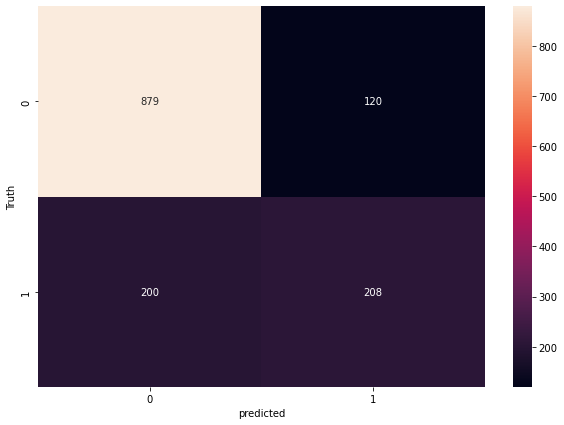

In [198]:
#confusion matrix

import seaborn as sns
cm = tf.math.confusion_matrix(labels=Y_test,predictions=yp)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d');
plt.xlabel("predicted")
plt.ylabel("Truth");


In [ ]:
#accuracy = 77% (f1 score)


In [ ]:

#convert the dataframe into 1 and zero for all the colomns
#x train and test will have the independent variables in 80-20% and same for y train and test for dependent variable
#use relu activation function for hidden networks (gives 0 for -ve value and same value if +ve)
#use sigmoid for last layer to get vaues between 0-1

#fit for training data  , evaluate for test data and predict for actual prediction

#classification report to check the accuracy
